<a href="https://colab.research.google.com/github/Deon62/CNN_Cifar10-ImageClassification-Model/blob/main/CNN_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Dense , Dropout , Activation , Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import regularizers
from tensorflow.keras import layers, models
import pickle

# load the cifar-10 dataset

In [ ]:
(x_train , y_train) , (x_test , y_test) = cifar10.load_data()

#normalizing the data
x_train , x_test = x_train/255.0 ,x_test/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


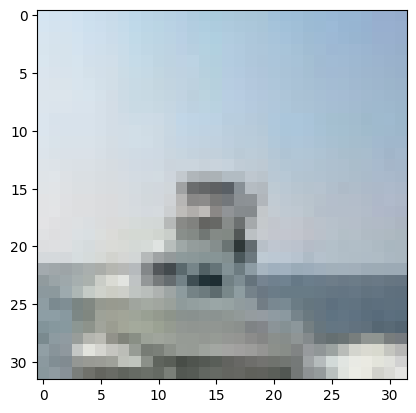

In [ ]:
plt.imshow(x_train[100])
plt.show()

In [ ]:
# Print the first few labels with their corresponding class names
for i, label in enumerate(y_train[:10]):
    print(f"Image {i + 1}: Label = {label[0]}, Class = {class_names[label[0]]}")


Image 1: Label = 6, Class = frog
Image 2: Label = 9, Class = truck
Image 3: Label = 9, Class = truck
Image 4: Label = 4, Class = deer
Image 5: Label = 1, Class = automobile
Image 6: Label = 1, Class = automobile
Image 7: Label = 2, Class = bird
Image 8: Label = 7, Class = horse
Image 9: Label = 8, Class = ship
Image 10: Label = 3, Class = cat


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Helps prevent overfitting
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)



In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 620,362 (2.37 MB)

 Trainable params: 620,362 (2.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
r = model.fit(x_train , y_train , epochs=15 , validation_data=(x_test , y_test))


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.3484 - loss: 1.7472 - val_accuracy: 0.6081 - val_loss: 1.0981
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5974 - loss: 1.1274 - val_accuracy: 0.6664 - val_loss: 0.9344
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6723 - loss: 0.9390 - val_accuracy: 0.7029 - val_loss: 0.8477
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7153 - loss: 0.8250 - val_accuracy: 0.7196 - val_loss: 0.8117
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7430 - loss: 0.7366 - val_accuracy: 0.7350 - val_loss: 0.7723
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7669 - loss: 0.6667 - val_accuracy: 0.7393 - val_loss: 0.7630
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7854 - loss: 0.6158 - val_accuracy: 0.7445 - val_loss: 0.7667
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8013 - loss: 0.5619 -

In [ ]:
test_loss , test_acc = model.evaluate(x_test , y_test)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7510 - loss: 0.8880
Test accuracy: 0.7476999759674072


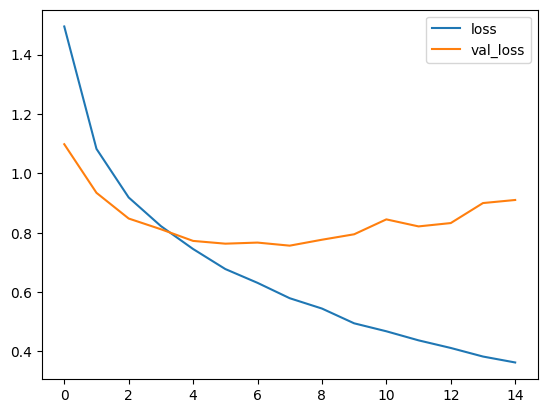

In [ ]:
plt.plot(r.history['loss'] , label='loss')
plt.plot(r.history['val_loss'] , label='val_loss')
plt.legend()

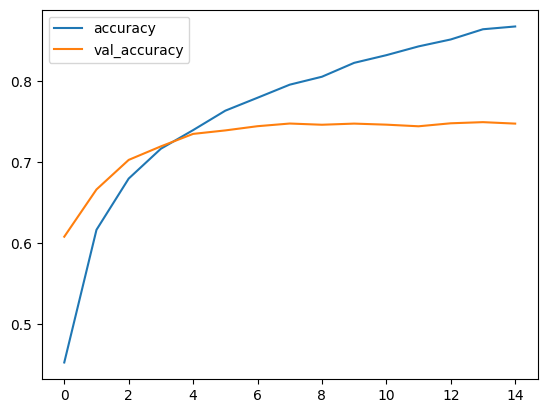

In [ ]:
plt.plot(r.history['accuracy'] , label='accuracy')
plt.plot(r.history['val_accuracy'] , label='val_accuracy')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


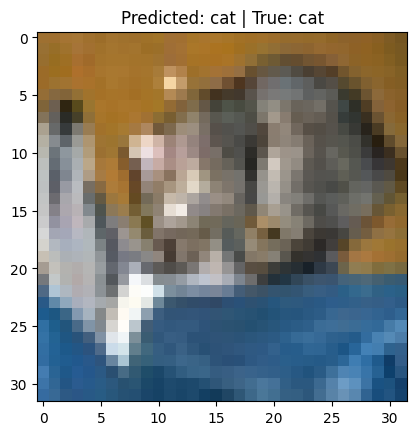

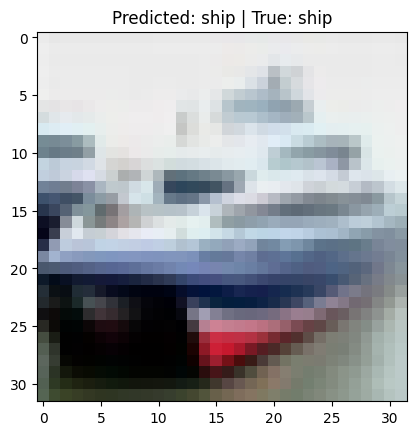

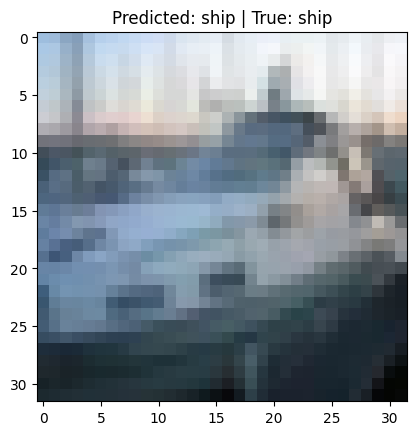

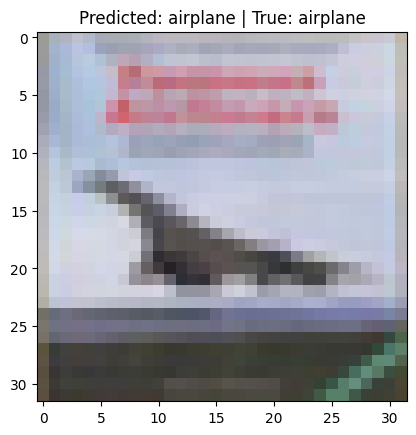

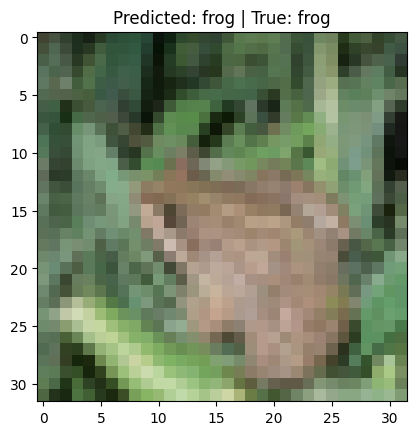

In [ ]:
# Make predictions
predictions = model.predict(x_test)

# Function to visualize predictions
def plot_prediction(index):
    plt.imshow(x_test[index])
    predicted_label = class_names[np.argmax(predictions[index])]
    true_label = class_names[y_test[index][0]]
    plt.title(f"Predicted: {predicted_label} | True: {true_label}")
    plt.show()

# Test the function on a few images
for i in range(5):
    plot_prediction(i)
